## Project: Unsupervised Learning
----------------------------------------
**Marks: 30**
-----------------------------------------

Welcome to the project on Unsupervised Learning. We will be using the Credit Card Customer Data for this project.

----------------------------
## Context: 
-----------------------------
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.


----------------------------
## Objective: 
-----------------------------

Identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

--------------------------
## About the data:
--------------------------
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

- Sl_no - Customer Serial Number
- Customer Key - Customer identification
- Avg_Credit_Limit	- Average credit limit (currency is not specified, you can make an assumption around this)
- Total_Credit_Cards	- Total number of credit cards 
- Total_visits_bank	- Total bank visits
- Total_visits_online -	 Total online visits
- Total_calls_made - Total calls made

## Importing libraries and overview of the dataset

In [5]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture



!pip install scikit-learn-extra

import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 389 kB 3.7 MB/s eta 0:00:01


#### Loading data

In [8]:
data = pd.read_excel('Credit+Card+Customer+Data.xlsx')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


#### Check the info of the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are 660 observations and 7 columns in the dataset.
- All columns have 660 non-null values i.e. there are no missing values.
- All columns are of int64 data type.

**There are no missing values. Let us now figure out the uniques in each column.** 

In [10]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Customer key, which is an identifier, has repeated values. We should treat the same accordingly before applying any algorithm.

## Data Preprocessing and Exploratory Data Analysis

#### **Question 1: Identify and drop the rows with duplicated customer keys (2 Marks)**

In [12]:
# Identify the duplicated customer keys
data[data.duplicated()]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


In [17]:
# Drop duplicated keys
data=data[~data.duplicated()]

We have done some basic checks. Now, let's drop the variables that are not required for our analysis.

In [ ]:
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

Now that we have dropped unnecessary column. We can again check for duplicates. Duplicates would mean customers with identical features.

In [ ]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


We can drop these duplicated rows from the data

In [ ]:
data=data[~data.duplicated()]

In [ ]:
data.shape

(644, 5)

- After removing duplicated keys and rows and unnecessary columns, there are 644 unique observations and 5 columns in our data.

#### Summary Statistics

#### **Question 2: Write your observations on the summary statistics of the data (1 Mark)**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


**Observations:**
- Average credit limit is 34,543.478261
- Average number of credit cards per customer is 4.694099

#### Now let's go ahead with the exploring each variable at hand. We will check the distribution and outliers for each variable in the data.

#### Question 3:
- **Check the distribution of all variables (use .hist() attribute) (2 Marks)**
- **Check outliers for all variables (use sns.boxplot()) (2 Mark)**
- **Write your observations (1 Marks)**

Sl_No
Skew : 0.0


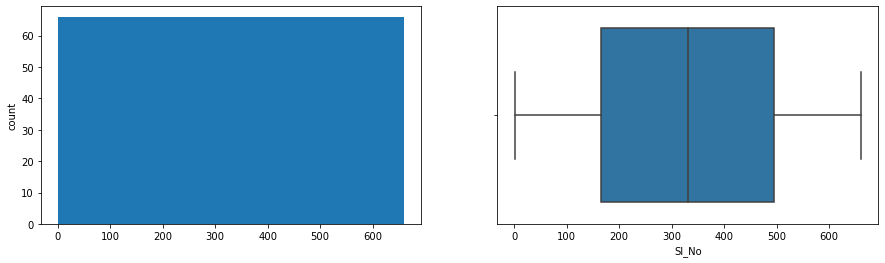

Customer Key
Skew : 0.05


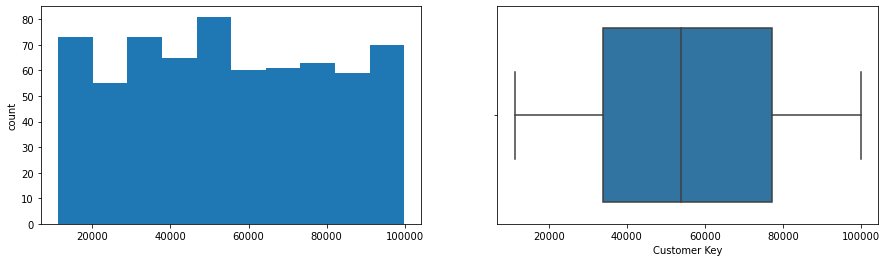

Avg_Credit_Limit
Skew : 2.2


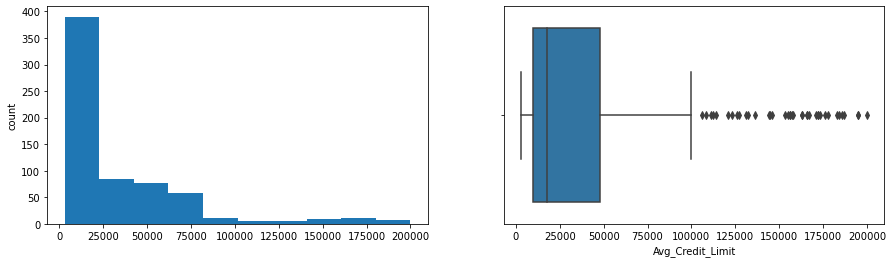

Total_Credit_Cards
Skew : 0.14


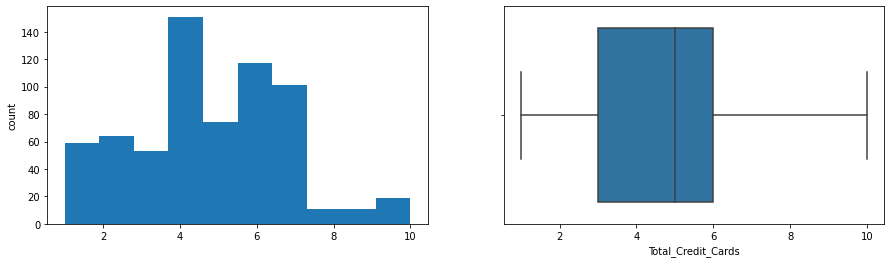

Total_visits_bank
Skew : 0.14


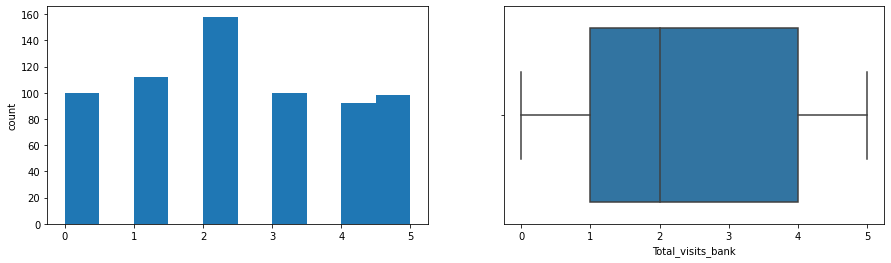

Total_visits_online
Skew : 2.23


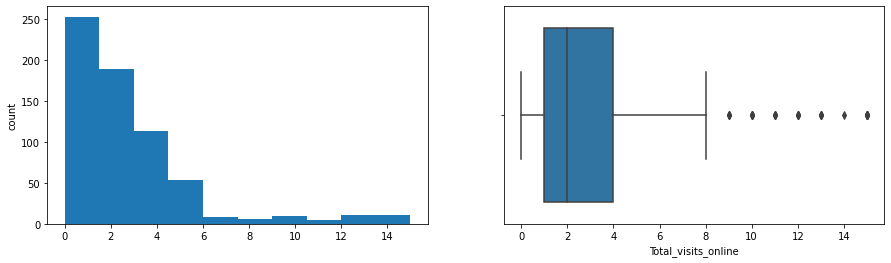

Total_calls_made
Skew : 0.66


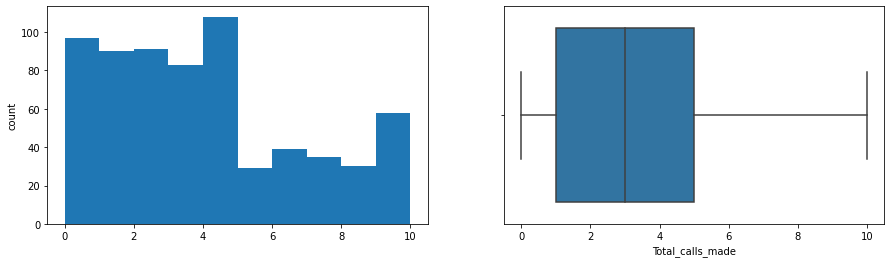

In [22]:
# Uncomment and complete the code by filling the blanks 

for col in data.columns:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observation:**
- The average credirt card limit offers the most outliers within the data set
- Many people do not visit the bank via online methods
- Most people have lower creditr card limits

**Now, let's check the correlation among different variables.**

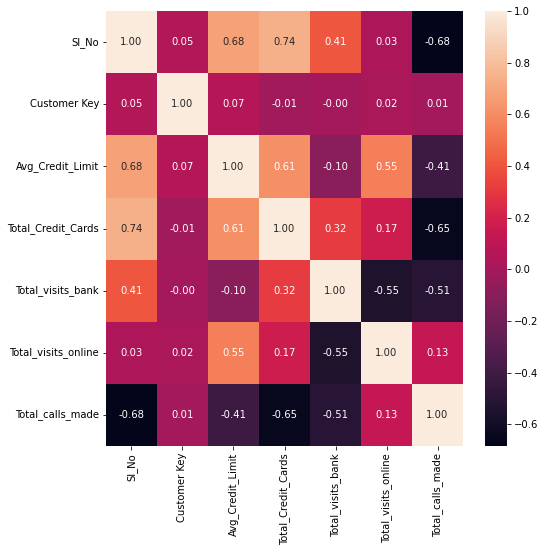

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.show()

**Observation:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards Total_visits_online which can makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

#### Scaling the data

In [24]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [25]:
data_scaled.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-1.729428,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-1.724180,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.718931,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-1.713683,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-1.708434,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [26]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

## K-Means

Let us now fit k-means algorithm on our scaled data and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the SSE for each k
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and find the elbow

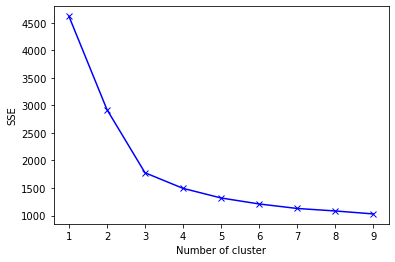

In [27]:
# step 1
sse = {} 

# step 2 - iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

# step 3
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

- Looking at the plot, we can say that elbow point is achieved for k=3.
- We will fit the k-means again with k=3 to get the labels.

#### Question 4: 

- **From the above elbow plot, state the reason for choosing k=3 and with random_state=1(1 Mark)**
- **Fit the K-means algorithms on the scaled data with number of cluster equal to 3 (2 Mark)**
- **Store the predictions as 'Labels' to the 'data_scaled_copy' and 'data' dataframes (2 Marks)**

In [30]:
kmeans = KMeans(n_clusters=3, random_state=1) #Apply the K-Means algorithm
kmeans.fit(data_scaled)#Fit the kmeans function on the scaled data

#Adding predicted labels to the original data and scaled data 
data_scaled_copy['Labels'] = kmeans.predict(data_scaled) #Save the predictions on the scaled data from K-Means
data['Labels'] = kmeans.predict(data_scaled) #Save the predictions on the scaled data from K-Means

- The optimal point is at the k=3 where as the value of k increases the distoriton score is not that significant.

#### **Question 5: Create cluster profiles using the below summary statistics and box plots for each label (6 Marks)**

In [31]:
#Number of observations in each cluster
data.Labels.value_counts()

1    384
0    226
2     50
Name: Labels, dtype: int64

In [32]:
#Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()
median = data.groupby('Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Sl_No,115.460177,420.500000,611.28,115.5,420.5,635.5
Customer Key,55072.902655,54977.705729,56708.76,54990.5,53084.0,53875.0
Avg_Credit_Limit,12831.858407,33507.812500,141040.00,12000.0,31000.0,145500.0
Total_Credit_Cards,2.433628,5.518229,8.74,2.0,6.0,9.0
Total_visits_bank,0.929204,3.505208,0.60,1.0,3.0,1.0
Total_visits_online,3.535398,0.979167,10.90,4.0,1.0,11.0
Total_calls_made,6.827434,2.000000,1.08,7.0,2.0,1.0


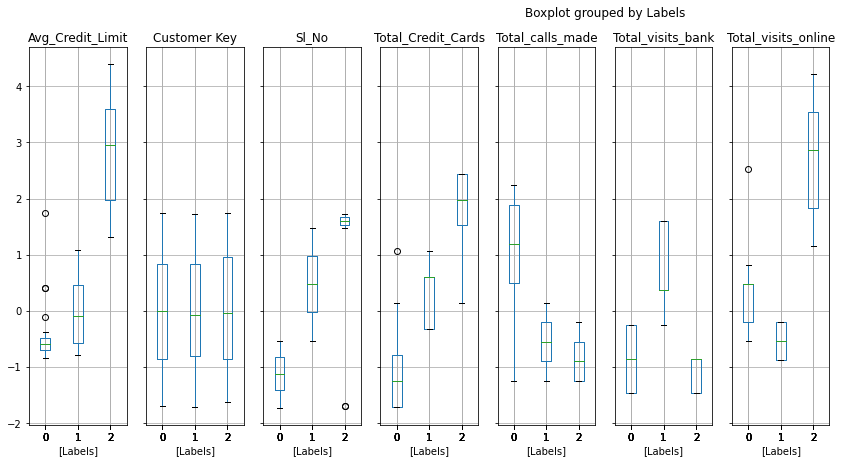

In [35]:
#Visualizing different features w.r.t K-means labels
data_scaled_copy.boxplot(by = 'Labels', layout = (1,10),figsize=(20,7))
plt.show()

**Cluster Profiles:**
- Cluster 1 has 2 observations. As observed from scatter plots and boxplots the median Average credit limit and total visits online provide the highest observed indicators for this group, group 2 consists of outlier with regards to the Customer Serial number.

- Cluster 0 seems to indicate customers with a lower Average card limit per customer.

- Cluster 1 is the largest cluster which shows customers with the highest Average card limit

## Gaussian Mixture

Let's create clusters using Gaussian Mixture Models

#### Question 6: 

- **Apply the Gaussian Mixture algorithm on the scaled data with random_state=1 (2 Marks)** 
- **Create cluster profiles using the below summary statistics and box plots for each label (2 Marks)**
- **Compare the clusters from both algorithms - K-means and Gaussian Mixture (1 Mark)**

In [37]:
gmm = GaussianMixture(n_components =3, random_state =1) #Apply the Gaussian Mixture algorithm
gmm.fit(data_scaled) #Fit the gmm function on the scaled data

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)
data['GmmLabels'] = gmm.predict(data_scaled)

In [38]:
#Number of observations in each cluster
data.GmmLabels.value_counts()

1    384
0    223
2     53
Name: GmmLabels, dtype: int64

In [39]:
#Calculating summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"]

mean = data.groupby('GmmLabels').mean()
median = data.groupby('GmmLabels').median()
df_gmm = pd.concat([mean, median], axis=0)
df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12197.309417,33507.812500,136452.830189,12000.0,31000.0,144000.0
Total_Credit_Cards,2.403587,5.518229,8.509434,2.0,6.0,9.0
Total_visits_bank,0.928251,3.505208,0.622642,1.0,3.0,1.0
Total_visits_online,3.560538,0.979167,10.377358,4.0,1.0,11.0
Total_calls_made,6.883408,2.000000,1.169811,7.0,2.0,1.0


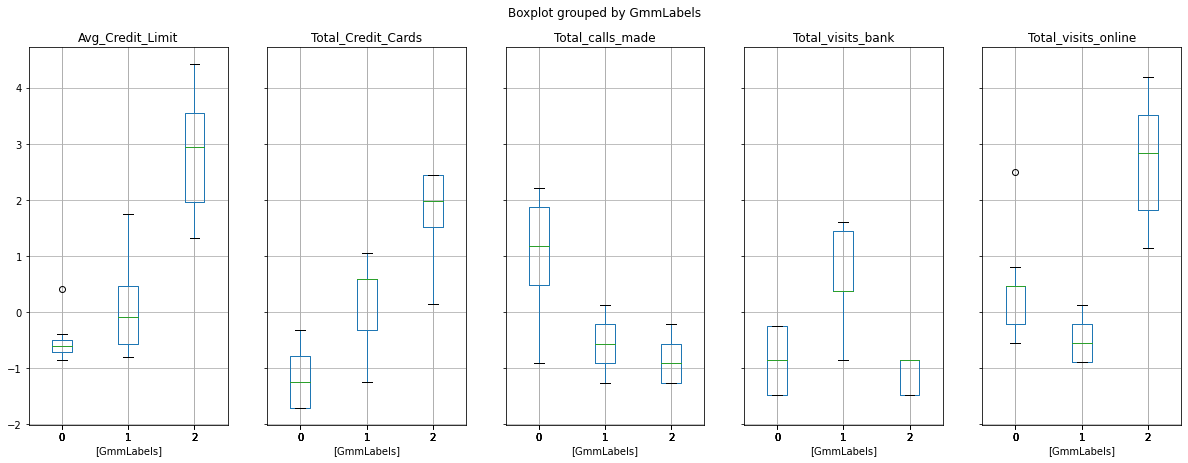

In [ ]:
# plotting boxplots with the new GMM based labels

features_with_lables = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made","GmmLabels"]

data_scaled_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1,5),figsize=(20,7))
plt.show()

**Cluster Profiles:**
- Cluster profile 0 shows the customers with the lowest Average Credit Limit and total credit cards in possesion
- Cluster profile 1 shows the customers with the median Average Credit Limit and total credit cards in possesion
- Cluster profile 2 shows the customers with the highest Average Credit Limit and total credit cards in possesion

**Comparing Clusters:**
- All customers in each cluster seem to vary porportionally to their Average credit card limit to their total vosot made online to the bank.
- The lower the card limit the higher the amount of calls made to the bank and vice versa.

## K-Medoids

#### Question 7: 

- **Apply the K-Mediods on the scaled data with random_state=1 (2 Marks)** 
- **Create cluster profiles using the below summary statistics and box plots for each label (2 Marks)**
- **Compare the clusters from both algorithms - K-Means and K-Medoids (2 Marks)**

In [44]:
! pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids 

In [45]:
kmedo = KMedoids(n_clusters=3, random_state=1) #Apply the K-Medoids algorithm
kmedo.fit(data_scaled) #Fit the kmedo function on the scaled data

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)
data['kmedoLabels'] = kmedo.predict(data_scaled)

In [46]:
#Number of observations in each cluster
data.kmedoLabels.value_counts()

0    233
2    229
1    198
Name: kmedoLabels, dtype: int64

In [47]:
#Calculating summary statistics of the original data for each label
mean = data.groupby('kmedoLabels').mean()
median = data.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,70300.429185,16828.282828,13567.685590,59000.0,14000.0,12000.0
Total_Credit_Cards,6.373391,5.333333,2.467249,6.0,5.0,2.0
Total_visits_bank,2.635193,3.838384,0.925764,3.0,4.0,1.0
Total_visits_online,3.008584,0.984848,3.598253,1.0,1.0,4.0
Total_calls_made,1.845494,1.934343,6.777293,2.0,2.0,7.0


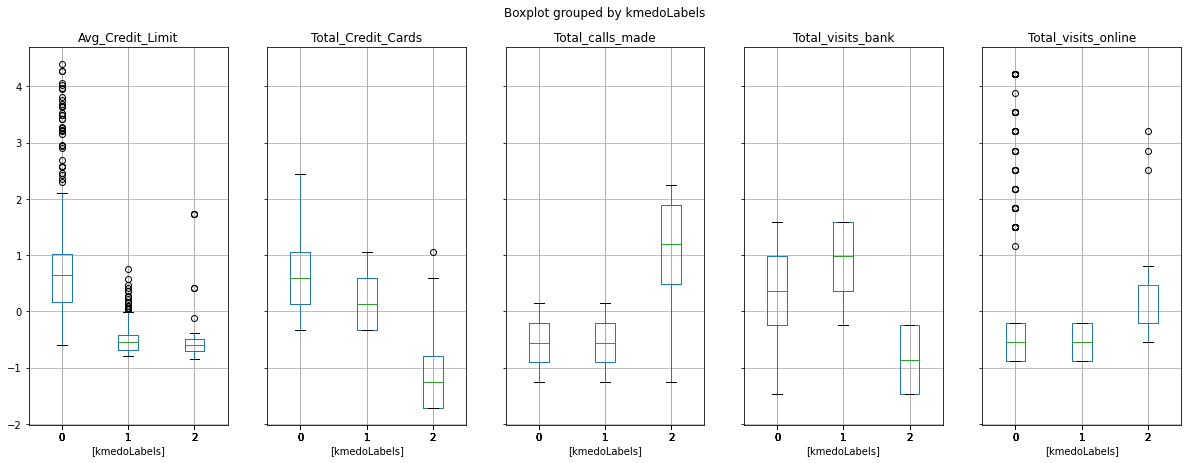

In [48]:
#plotting boxplots with the new K-Medoids based labels

features_with_lables = ["Avg_Credit_Limit",	"Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made","kmedoLabels"]

data_scaled_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1,5),figsize=(20,7))
plt.show()

Let's compare the clusters from K-Means and K-Medoids 

In [ ]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis=1)[original_features]
comparison

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
group_0 Mean,12216.216216,12239.819005,2.423423,2.411765,0.950450,0.945701,3.554054,3.561086,6.878378,6.891403
group_1 Mean,85052.631579,33893.048128,7.030075,5.508021,1.691729,3.489305,4.639098,0.975936,1.969925,1.997326
group_2 Mean,28449.826990,140102.040816,5.363322,8.775510,3.830450,0.591837,0.982699,10.979592,1.851211,1.102041
group_0 Median,12000.000000,12000.000000,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,7.000000,7.000000
group_1 Median,68000.000000,31500.000000,7.000000,6.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000
group_2 Median,20000.000000,145000.000000,5.000000,9.000000,4.000000,1.000000,1.000000,11.000000,2.000000,1.000000


**Cluster Profiles:**
- Cluster 1 has the highest credit card limit average, Cluster 0 has the lowest credit card limit group and Cluster 2 has the customers with the middle ranged credit card limit

**Comparing Clusters:**
- All clusters seems to have many outliers with their Average card limits, cluster 1 does not consist of any extreme outliers on total number of online visits. Therefore, it is not adding any value to our cluster analysis.